Iteration 1 - Learning Rate: 0.0001, Weights: [6.30706667 6.30706667 6.30706667], Loss: 0.5178571428571429
Iteration 10 - Learning Rate: 0.0001, Weights: [-4335.8372 -4335.8372 -4335.8372], Loss: 0.5238095238095238
Iteration 20 - Learning Rate: 0.0001, Weights: [-4271.76653333 -4271.76653333 -4271.76653333], Loss: 0.5238095238095238
Iteration 50 - Learning Rate: 0.0001, Weights: [-4079.55453333 -4079.55453333 -4079.55453333], Loss: 0.5238095238095238
Iteration 100 - Learning Rate: 0.0001, Weights: [-3759.2012 -3759.2012 -3759.2012], Loss: 0.5238095238095238
Iteration 200 - Learning Rate: 0.0001, Weights: [-3118.49453333 -3118.49453333 -3118.49453333], Loss: 0.5238095238095238
Iteration 300 - Learning Rate: 0.0001, Weights: [-2477.78786667 -2477.78786667 -2477.78786667], Loss: 0.5238095238095238
Iteration 1 - Learning Rate: 0.0005, Weights: [31.53533333 31.53533333 31.53533333], Loss: 0.5178571428571429
Iteration 10 - Learning Rate: 0.0005, Weights: [-21679.186 -21679.186 -21679.186], L

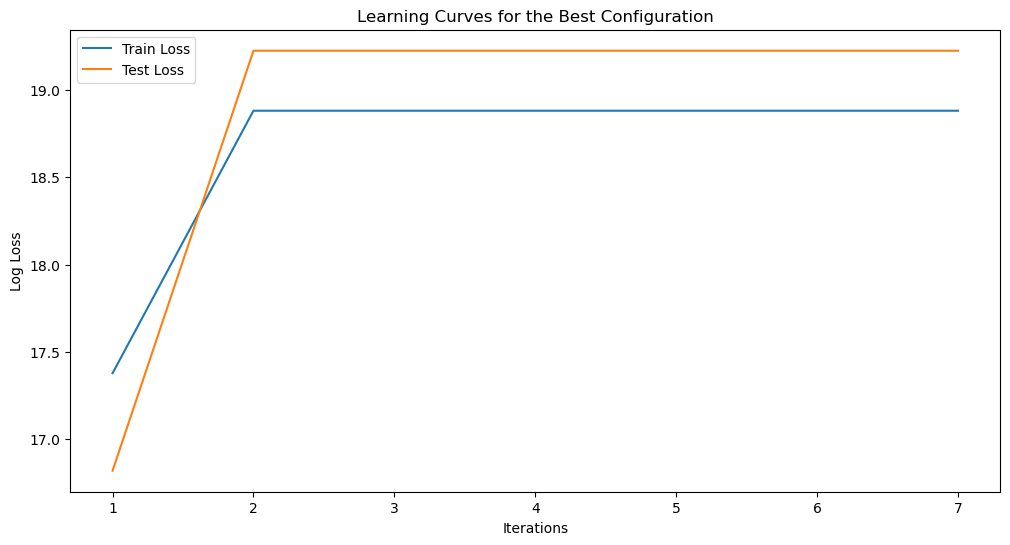

In [2]:
#Self Implemented Logistic Predictor

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

# Load your data into a Pandas DataFrame
data = pd.read_excel('MessageData.xlsx')

# Define features (TimeDelay, Common_Keyword_Count, and Has_Questions)
X = data[['TimeDelay', 'Common_Keyword_Count', 'Has_Questions']]

# Define class label
y = data['isResponse']

# Convert X and y to numpy arrays
X = X.values
y = y.values
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

def logistic_predictor(weights, features, threshold=0.5):
    # Calculate the linear prediction
    linear_prediction = np.dot(weights, features)

    # Apply the threshold to make binary predictions
    if linear_prediction >= threshold:
        return 1
    else:
        return 0

def gradient_descent(features, labels, learning_rate, num_iterations):
    num_features = features.shape[1]  # Get the number of features
    weights = np.zeros(num_features)  # Initialize weights to zeros
    losses = []

    for _ in range(num_iterations):
        predictions = np.array([logistic_predictor(weights, instance) for instance in features])  # Linear prediction
        error = labels - predictions
        gradient = -np.sign(error)
        weights -= learning_rate * (gradient @ features).mean(axis=0)  # Perform matrix-vector multiplication
        current_loss = np.abs(error).mean()  # Calculate MAE
        losses.append(current_loss)

    return weights, losses

# Define different configurations (learning rates and iterations)
learning_rates = [0.0001, 0.0005, 0.001, 0.005]
num_iterations = [1, 10, 20, 50, 100, 200, 300]


# Store results
best_result = None
min_test_loss = float('inf')

# Loop over configurations
for lr in learning_rates:
    train_losses = []
    test_losses = []
    accuracies = []
    best_weights = None
    best_accuracy = 0

    for it in num_iterations:
        weights, losses = gradient_descent(X_train, y_train, lr, it)
        print(f"Iteration {it} - Learning Rate: {lr}, Weights: {weights}, Loss: {losses[-1]}")
        y_train_proba = np.array([logistic_predictor(weights, instance) for instance in X_train])
        y_test_proba = np.array([logistic_predictor(weights, instance) for instance in X_test])
        train_log_loss = log_loss(y_train, y_train_proba)
        test_log_loss = log_loss(y_test, y_test_proba)
        train_losses.append(train_log_loss)
        test_losses.append(test_log_loss)

        # Calculate accuracy on test data
        y_test_pred = np.array([logistic_predictor(weights, instance) for instance in X_test])
        accuracy = accuracy_score(y_test, y_test_pred)
        accuracies.append(accuracy)

        # Update best weights if test loss improves
        if test_log_loss < min_test_loss:
            min_test_loss = test_log_loss
            best_result = {'Learning Rate': lr, 'Iterations': it, 'Train Losses': train_losses, 'Test Losses': test_losses,
                           'Accuracies': accuracies, 'Best Weights': weights, 'Best Accuracy': accuracy}

# Print results for the configuration with the minimum test loss
print(f"Best Learning Rate: {best_result['Learning Rate']}")
print(f"Best Iterations: {best_result['Iterations']}")
print(f"Best Test Loss: {min_test_loss}")
print(f"Best Accuracy: {best_result['Best Accuracy']}")
print(f"Best Weights: {best_result['Best Weights']}")

# Use the best_weights to make predictions on the test data
y_pred = np.array([logistic_predictor(best_result['Best Weights'], instance) for instance in X_test])

# Calculate accuracy on test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Predictor: {accuracy}")



# Plot the learning curves for the best configuration
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(best_result['Train Losses']) + 1), best_result['Train Losses'], label="Train Loss")
plt.plot(range(1, len(best_result['Test Losses']) + 1), best_result['Test Losses'], label="Test Loss")
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.legend()
plt.title('Learning Curves for the Best Configuration')
plt.show()



Accuracy of Logistic Regression model: 1.0


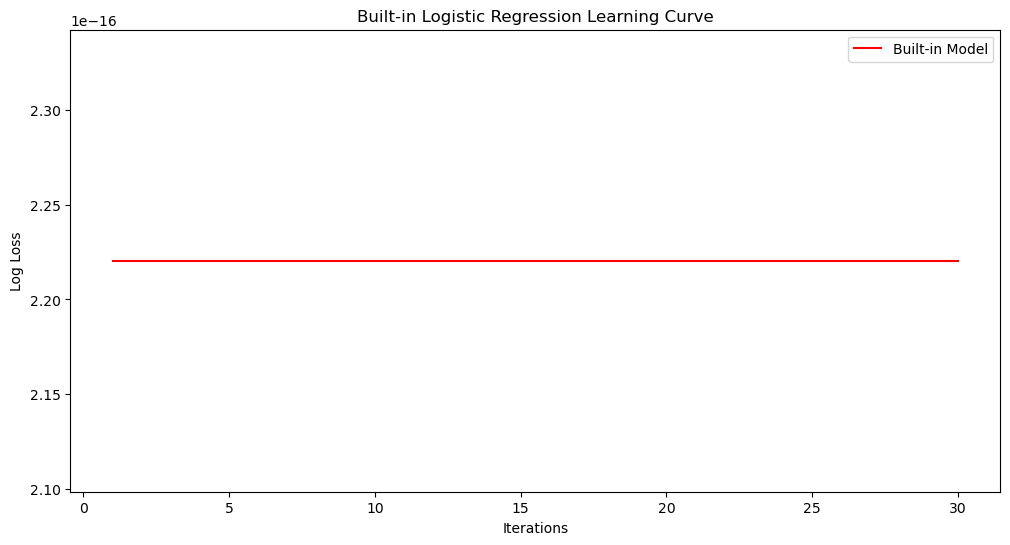

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression


# Load your data into a Pandas DataFrame
data = pd.read_excel('MessageData.xlsx')

# Define features (TimeDelay, Common_Keyword_Count, and Has_Questions)
X = data[['TimeDelay', 'Common_Keyword_Count', 'Has_Questions']]

# Define class label
y = data['isResponse']

# Convert X and y to numpy arrays
X = X.values
y = y.values


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Train a Logistic Regression model 
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy on test data
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy on screen
print(f"Accuracy of Logistic Regression model: {accuracy}")


        
built_in_loss = log_loss(y_test, y_pred)

# Plot a line for the built-in model's log loss
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_pred) + 1), [built_in_loss] * len(y_pred), color='r', linestyle='-', label="Built-in Model")

plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.legend()
plt.title('Built-in Logistic Regression Learning Curve')
plt.show()
